<a href="https://colab.research.google.com/github/roshansadath/COMP6721-AppliedAI/blob/main/Simple%20Chest%20XRay/ResNet18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import os, time, random, torch, warnings
import numpy as np
from PIL import Image
import torch.nn as nn
import seaborn as sns
from tqdm import tqdm
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import precision_score, recall_score, f1_score

warnings.simplefilter("ignore")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
data_path = "drive/My Drive/Simple_Chest_XRay/"
#data_path = "drive/My Drive/NIH_Chest_XRay/"
#data_path = "drive/My Drive/Harvard_Chest_XRay/"

sample_ratio = 0.4
batch_size = 64
num_epochs = 15

In [ ]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

**DATA PREPROCESSING**


In [ ]:
%run "/content/drive/My Drive/Colab Notebooks/utils.ipynb"
dataset, train_loader, train_indices, test_loader, test_indices, val_loader, val_indices = data_preprocess(data_path, sample_ratio)

 **DOWNLOAD RESNET18 MODEL AND TRAIN**


In [ ]:
def save_metrics(loss, accuracy, model):
  np.save("{}{}_train_loss.npy".format(data_path, model), loss)
  np.save("{}{}_train_accuracy.npy".format(data_path, model), accuracy)

In [ ]:
# Define the ResNet18 model and set Pretraining to False to train model from scratch
model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet18', pretrained = False)
model.fc = nn.Linear(512, len(dataset.classes))
model.to(device)

# Define loss function a  s CrossEntropy and optimizer as Adam Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
losses, accuracies, true, pred, v_accuracies, v_losses = [], [], [], [], [], []

# Train model on training set
for epoch in range(num_epochs):
    train_loss, train_accuracy, start_time = 0.0, 0.0, time.time()

    with tqdm(total=len(train_loader), desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as pbar:
      for inputs, labels in train_loader:
          inputs = inputs.to(device)
          labels = labels.to(device)

          optimizer.zero_grad()
          outputs = model(inputs)
          _, preds = torch.max(outputs, 1)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          train_loss += loss.item() * inputs.size(0)
          train_accuracy += torch.sum(preds == labels.data)
          pred.extend(preds.cpu().numpy())
          true.extend(labels.cpu().numpy())
          
          pbar.set_postfix({'loss': loss.item()})
          pbar.update()

    train_loss /= len(train_indices)
    train_accuracy /= len(train_indices)
    _recall = recall_score(true, pred, average='macro')
    _precision = precision_score(true, pred, average='macro')
    _fscore = f1_score(true, pred, average='macro')

    print('Epoch: {} | Accuracy: {:.4f} | Loss: {:.4f} | Recall: {:.4f} | Precision: {:.4f} | F-Score: {:.4f} | Time: {:.4f}s'.format(epoch+1, train_accuracy, train_loss, _recall, _precision, _fscore, time.time() - start_time))
    val_accuracy, val_loss = evaluate_model(model, val_loader, val_indices, 'VALIDATION', criterion, data_path, "ResNet18")
    v_accuracies.append(val_accuracy)
    v_losses.append(val_loss)
    losses.append(train_loss)
    accuracies.append(train_accuracy.item())

save_metrics(losses, accuracies, "ResNet18")

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.9.0
Epoch 1/15: 100%|██████████| 26/26 [00:31<00:00,  1.22s/batch, loss=0.166]


Epoch: 1 | Accuracy: 0.8572 | Loss: 0.3278 | Recall: 0.8445 | Precision: 0.8230 | F-Score: 0.8322 | Time: 31.6316s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.7787 | Loss: 0.8440 | Recall: 0.5517 | Precision: 0.8865 | F-score: 0.5297



Epoch 2/15: 100%|██████████| 26/26 [00:31<00:00,  1.20s/batch, loss=0.503]

Epoch: 2 | Accuracy: 0.6199 | Loss: 1.5836 | Recall: 0.6747 | Precision: 0.6802 | F-Score: 0.6772 | Time: 31.3199s


MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.7532 | Loss: 0.5563 | Recall: 0.5000 | Precision: 0.3766 | F-score: 0.4296



Epoch 3/15: 100%|██████████| 26/26 [00:31<00:00,  1.22s/batch, loss=0.555]


Epoch: 3 | Accuracy: 0.7206 | Loss: 0.5581 | Recall: 0.6248 | Precision: 0.6655 | F-Score: 0.6340 | Time: 31.8648s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8128 | Loss: 0.3934 | Recall: 0.7424 | Precision: 0.7483 | F-score: 0.7452



Epoch 4/15: 100%|██████████| 26/26 [00:30<00:00,  1.19s/batch, loss=0.546]

Epoch: 4 | Accuracy: 0.7267 | Loss: 0.5524 | Recall: 0.6191 | Precision: 0.6629 | F-Score: 0.6278 | Time: 31.0045s


MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.7532 | Loss: 0.4476 | Recall: 0.5058 | Precision: 0.6277 | F-score: 0.4459



Epoch 5/15: 100%|██████████| 26/26 [00:30<00:00,  1.18s/batch, loss=0.301]


Epoch: 5 | Accuracy: 0.8017 | Loss: 0.4366 | Recall: 0.6370 | Precision: 0.6863 | F-Score: 0.6481 | Time: 30.7100s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8426 | Loss: 0.3195 | Recall: 0.8201 | Precision: 0.7869 | F-score: 0.8004



Epoch 6/15: 100%|██████████| 26/26 [00:30<00:00,  1.16s/batch, loss=0.503]

Epoch: 6 | Accuracy: 0.8493 | Loss: 0.3571 | Recall: 0.6648 | Precision: 0.7128 | F-Score: 0.6781 | Time: 30.0891s


MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8511 | Loss: 0.3263 | Recall: 0.8548 | Precision: 0.7994 | F-score: 0.8181



Epoch 7/15: 100%|██████████| 26/26 [00:31<00:00,  1.20s/batch, loss=0.395]


Epoch: 7 | Accuracy: 0.8261 | Loss: 0.4112 | Recall: 0.6793 | Precision: 0.7258 | F-Score: 0.6933 | Time: 31.1681s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8468 | Loss: 0.3285 | Recall: 0.7070 | Precision: 0.8667 | F-score: 0.7438



Epoch 8/15: 100%|██████████| 26/26 [00:30<00:00,  1.17s/batch, loss=0.182]

Epoch: 8 | Accuracy: 0.8676 | Loss: 0.3065 | Recall: 0.6970 | Precision: 0.7429 | F-Score: 0.7118 | Time: 30.4096s


MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8766 | Loss: 0.2965 | Recall: 0.8891 | Precision: 0.8283 | F-score: 0.8493



Epoch 9/15: 100%|██████████| 26/26 [00:31<00:00,  1.21s/batch, loss=0.461]


Epoch: 9 | Accuracy: 0.8322 | Loss: 0.3912 | Recall: 0.7083 | Precision: 0.7490 | F-Score: 0.7223 | Time: 31.5358s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8936 | Loss: 0.3282 | Recall: 0.8251 | Precision: 0.8777 | F-score: 0.8467



Epoch 10/15: 100%|██████████| 26/26 [00:30<00:00,  1.19s/batch, loss=0.413]

Epoch: 10 | Accuracy: 0.8438 | Loss: 0.3578 | Recall: 0.7142 | Precision: 0.7572 | F-Score: 0.7290 | Time: 30.9826s


MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8681 | Loss: 0.2919 | Recall: 0.8777 | Precision: 0.8187 | F-score: 0.8389



Epoch 11/15: 100%|██████████| 26/26 [00:31<00:00,  1.22s/batch, loss=0.251]

Epoch: 11 | Accuracy: 0.8743 | Loss: 0.2925 | Recall: 0.7255 | Precision: 0.7667 | F-Score: 0.7402 | Time: 31.7439s


MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.9319 | Loss: 0.2102 | Recall: 0.9200 | Precision: 0.9020 | F-score: 0.9105



Epoch 12/15: 100%|██████████| 26/26 [00:30<00:00,  1.17s/batch, loss=0.227]

Epoch: 12 | Accuracy: 0.9128 | Loss: 0.2288 | Recall: 0.7389 | Precision: 0.7788 | F-Score: 0.7536 | Time: 30.3539s


MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.9319 | Loss: 0.1807 | Recall: 0.9200 | Precision: 0.9020 | F-score: 0.9105



Epoch 13/15: 100%|██████████| 26/26 [00:30<00:00,  1.18s/batch, loss=0.147]

Epoch: 13 | Accuracy: 0.9201 | Loss: 0.2027 | Recall: 0.7513 | Precision: 0.7895 | F-Score: 0.7658 | Time: 30.6502s


MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.9660 | Loss: 0.1466 | Recall: 0.9542 | Precision: 0.9542 | F-score: 0.9542



Epoch 14/15: 100%|██████████| 26/26 [00:30<00:00,  1.19s/batch, loss=0.231]


Epoch: 14 | Accuracy: 0.9109 | Loss: 0.2093 | Recall: 0.7608 | Precision: 0.7977 | F-Score: 0.7752 | Time: 30.9348s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.9277 | Loss: 0.1696 | Recall: 0.8592 | Precision: 0.9467 | F-score: 0.8928



Epoch 15/15: 100%|██████████| 26/26 [00:30<00:00,  1.18s/batch, loss=0.0527]

Epoch: 15 | Accuracy: 0.9274 | Loss: 0.1787 | Recall: 0.7707 | Precision: 0.8061 | F-Score: 0.7847 | Time: 30.6293s


MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.9617 | Loss: 0.1236 | Recall: 0.9398 | Precision: 0.9561 | F-score: 0.9476



**SAVE MODEL PARAMETERS**

In [ ]:
torch.save(model.state_dict(), "{}resnet18.pth".format(data_path))

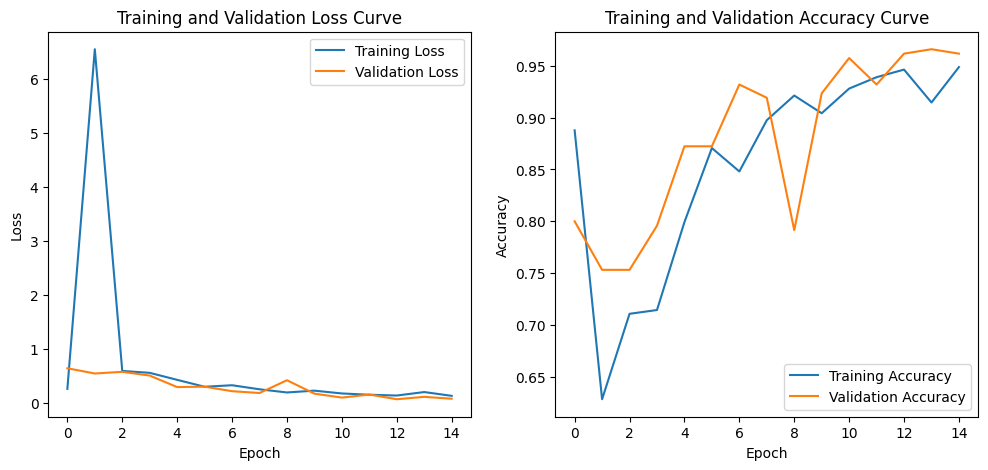

In [ ]:
#Plotting the Loss and Accuracy Curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(losses, label = "Training Loss")
ax1.plot(v_losses, label = "Validation Loss")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss Curve')
ax1.legend()

ax2.plot(accuracies, label = "Training Accuracy")
ax2.plot(v_accuracies, label = "Validation Accuracy")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy Curve')
ax2.legend()

plt.show()

**EVALUATE MODEL ON TEST SET**

In [ ]:
#Evaluate Model on Test Set
evaluate_model(model, test_loader, test_indices, 'TEST', criterion, data_path, "ResNet18")

In [ ]:
#Obtain the TSNE Plot for the data
features = []
labels = []
for images, targets in train_loader:
    with torch.no_grad():
        output = model(images)
        features.append(output.cpu().numpy())
        labels.append(targets.numpy())

features = np.vstack(features)
labels = np.concatenate(labels)

# Perform t-SNE on the feature vectors
tsne = TSNE(n_components=2, perplexity = 20, learning_rate = 600, n_iter = 900)
tsne_features = tsne.fit_transform(features)

plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=labels, cmap=plt.cm.get_cmap('jet', len(dataset.classes)))
plt.legend()
plt.title('t-SNE Plot')
plt.show()

In [ ]:
# Get the class labels and the number of classes
class_labels = dataset.classes
num_classes = len(class_labels)

# Get the number of images per class
num_images_per_class = []
for i in range(num_classes):
    class_indices = np.where(np.array(dataset.targets) == i)[0]
    num_images_per_class.append(len(class_indices))

# Compute the mean and variance of the images per class
mean_num_images = np.mean(num_images_per_class)
var_num_images = np.var(num_images_per_class)

# Plot the within-class variance
fig, ax = plt.subplots()
ax.bar(class_labels, num_images_per_class)
ax.axhline(y=mean_num_images, linestyle='--', color='r', label='Mean')
ax.axhspan(mean_num_images - np.sqrt(var_num_images), mean_num_images + np.sqrt(var_num_images),
           alpha=0.2, color='y', label='Variance')
ax.legend()
plt.xticks(rotation = 0)
plt.ylabel('Number of Images')
plt.xlabel('Class Labels')
plt.title('Within-Class Variance Plot')
plt.show()

In [ ]:
def within_class_variance(dataset, model):
    # Set the model to evaluation mode
    model.load_state_dict(model['model_state_dict'])
    model.eval()
    # Get the feature vectors and labels for the dataset
    features = []
    labels = []
    for images, targets in train_loader:
        with torch.no_grad():
          images = images.to(device)
          targets = targets.to(device)
          output = model(images)
          features.append(output.cpu().numpy()[0])
          labels.append(targets.cpu().numpy()[0])
    features = np.array(features)
    labels = np.array(labels)
    
    # Calculate the within-class variance for each class
    class_variances = []
    for c in np.unique(labels):
        class_features = features[labels == c]
        class_mean = np.mean(class_features, axis=0)
        class_variance = np.mean(np.sum((class_features - class_mean)**2, axis=1))
        class_variances.append(class_variance)
    
    return class_variances

# Define the dataset and model
# Calculate the within-class variance
class_variances = within_class_variance(dataset, model)

# Plot the within-class variances for each class
plt.bar(np.arange(len(class_variances)), class_variances)
plt.xticks(np.arange(len(class_variances)), dataset.classes, rotation='vertical')
plt.ylabel('Within-class variance')
plt.show()